# APP MILESTONE -3

#### AJAY AKSHAT WADHWA-502104008
#### PRIYANSHI SHARMA-502104175

# Detailed Column Descriptions

### Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")



-------Related with the last contact of the current campaign:-----------------

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)



-------Other attributes: --------------------------

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


-------------Output variable (desired target):-----------------------

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('bank-full.csv')

In [3]:
data

,age,job,marital,education,default,balance,day,month,duration,campaign,pdays,previous,poutcome,y,housing,loan
0,58,management,married,tertiary,no,2143,5,may,261,1,-1,0,unknown,no,yes,no
1,44,technician,single,secondary,no,29,5,may,151,1,-1,0,unknown,no,yes,no
2,33,entrepreneur,married,secondary,no,2,5,may,76,1,-1,0,unknown,no,yes,yes
3,47,blue-collar,married,unknown,no,1506,5,may,92,1,-1,0,unknown,no,yes,no
4,33,unknown,single,unknown,no,1,5,may,198,1,-1,0,unknown,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,17,nov,977,3,-1,0,unknown,yes,no,no
45207,71,retired,divorced,primary,no,1729,17,nov,456,2,-1,0,unknown,yes,no,no
45208,72,retired,married,secondary,no,5715,17,nov,1127,5,184,3,success,yes,no,no
45209,57,blue-collar,married,secondary,no,668,17,nov,508,4,-1,0,unknown,no,no,no


In [4]:
data1=data.iloc[:,:14]
data1

,age,job,marital,education,default,balance,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,17,nov,508,4,-1,0,unknown,no


In [5]:
data1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'housing', 'loan'],
      dtype='object')

In [6]:
X=data1.iloc[:,0:-1]
Y=data1.iloc[:,13:14]
Y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [7]:
X

,age,job,marital,education,default,balance,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,17,nov,508,4,-1,0,unknown


In [8]:
X=pd.get_dummies(X)
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36168, 44)
(9043, 44)
(36168, 1)
(9043, 1)


In [11]:
# feature scaling
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# model creation __ NAive Bayes classifier
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train, Y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [13]:
Y_pred = NBC.predict(X_test)
Y_pred

array(['no', 'yes', 'no', ..., 'no', 'yes', 'no'], dtype='<U3')

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm


array([[7223,  757],
       [ 547,  516]], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

85.58000663496628

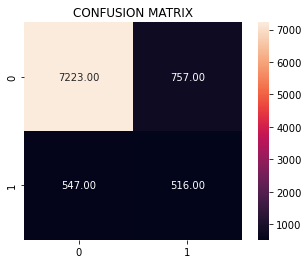

In [16]:
# CONFUSION MATRIX "HEAT MAP"
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt = '.2f', square= True)

plt.title('CONFUSION MATRIX')
plt.show()

# NEW MODEL KNN CLASSIFIER


In [17]:
# Creating the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train, Y_train)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [18]:
# Prediction ---Test dataset
Y_pred=knn.predict(X_test)
Y_pred

MemoryError: Unable to allocate 1.00 GiB for an array with shape (3710, 36168) and data type float64

In [20]:
# Evaluating the perfromane of the model
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test, Y_pred)
cm1

array([[7710,  270],
       [ 744,  319]], dtype=int64)

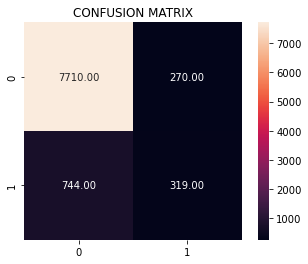

In [41]:
# CONFUSION MATRIX "HEAT MAP"
import seaborn as sns
sns.heatmap(cm1, annot=True, fmt = '.2f', square= True)
plt.title('CONFUSION MATRIX')
plt.show()

In [22]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

88.78690699988941

In [23]:
X_test

array([[-0.36959746,  0.01002256, -0.69851397, ..., -0.20517128,
        -0.18404781,  0.47153594],
       [-0.46383039, -0.52714281, -0.21770297, ..., -0.20517128,
        -0.18404781,  0.47153594],
       [ 0.57273185, -0.57677221, -0.93891946, ..., -0.20517128,
        -0.18404781,  0.47153594],
       ...,
       [-1.21769384, -0.44280525,  1.10452727, ..., -0.20517128,
        -0.18404781,  0.47153594],
       [ 1.70352703, -0.44507588, -1.29952771, ..., -0.20517128,
        -0.18404781,  0.47153594],
       [ 0.85543065, -0.54725407, -0.93891946, ..., -0.20517128,
        -0.18404781,  0.47153594]])

In [24]:
Y_test

,y
14001,no
32046,yes
13318,no
42991,no
14237,no
...,...
18448,yes
6654,no
17106,no
9025,yes


In [25]:
Y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

# DATA VISUALIZATION

In [26]:
# import the lib
import seaborn as sns
import pandas as pd

In [27]:
# read the data set
Market_bank = pd.read_csv('bank-full.csv')
Market_bank.head

<bound method NDFrame.head of        age           job   marital  education default  balance  day month  \
0       58    management   married   tertiary      no     2143    5   may   
1       44    technician    single  secondary      no       29    5   may   
2       33  entrepreneur   married  secondary      no        2    5   may   
3       47   blue-collar   married    unknown      no     1506    5   may   
4       33       unknown    single    unknown      no        1    5   may   
...    ...           ...       ...        ...     ...      ...  ...   ...   
45206   51    technician   married   tertiary      no      825   17   nov   
45207   71       retired  divorced    primary      no     1729   17   nov   
45208   72       retired   married  secondary      no     5715   17   nov   
45209   57   blue-collar   married  secondary      no      668   17   nov   
45210   37  entrepreneur   married  secondary      no     2971   17   nov   

       duration  campaign  pdays  previous po

In [28]:
Market_bank.head(2)

,age,job,marital,education,default,balance,day,month,duration,campaign,pdays,previous,poutcome,y,housing,loan
0,58,management,married,tertiary,no,2143,5,may,261,1,-1,0,unknown,no,yes,no
1,44,technician,single,secondary,no,29,5,may,151,1,-1,0,unknown,no,yes,no


<AxesSubplot:xlabel='balance', ylabel='age'>

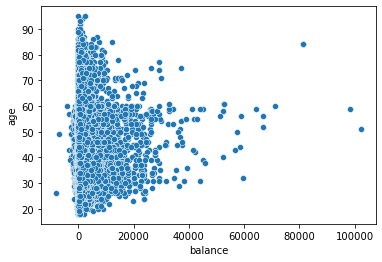

In [29]:
# scatter plot
sns.scatterplot(x='balance', y='age', data = Market_bank)

<AxesSubplot:xlabel='balance', ylabel='age'>

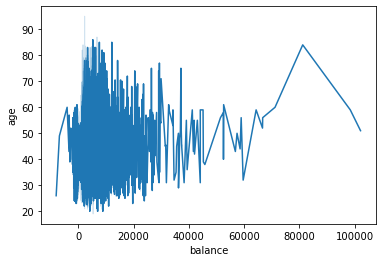

In [30]:
# line plot
sns.lineplot(x='balance', y='age', data = Market_bank)

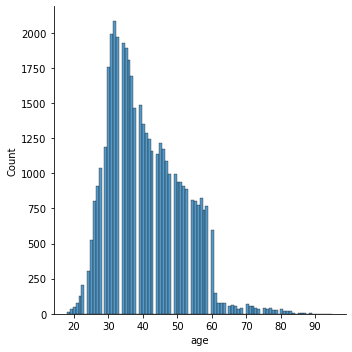

In [31]:
 # distriutio plot

sns.displot(Market_bank['age'])

<AxesSubplot:xlabel='balance', ylabel='age'>

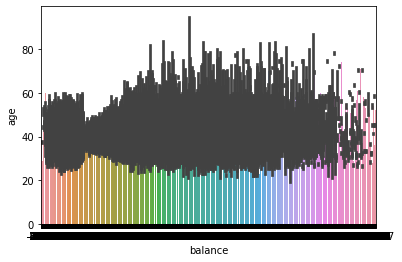

In [32]:
# arplot
sns.barplot(x='balance', y='age', data = Market_bank)

<AxesSubplot:xlabel='age', ylabel='Density'>

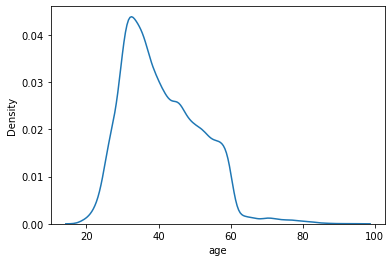

In [33]:
#kde plot (univariate plot)
sns.kdeplot(Market_bank['age'])

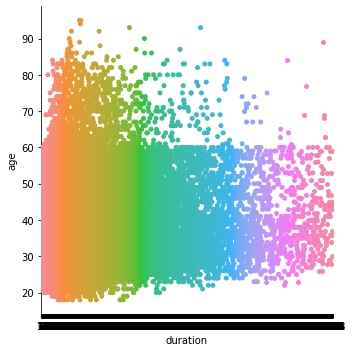

In [34]:
# categorical plot
sns.catplot(x='duration', y='age', data = Market_bank)

<AxesSubplot:xlabel='age', ylabel='count'>

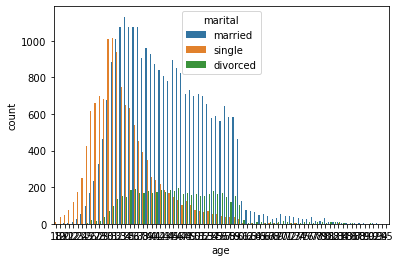

In [35]:
#count plot
sns.countplot(x='age', data = Market_bank, hue='marital')

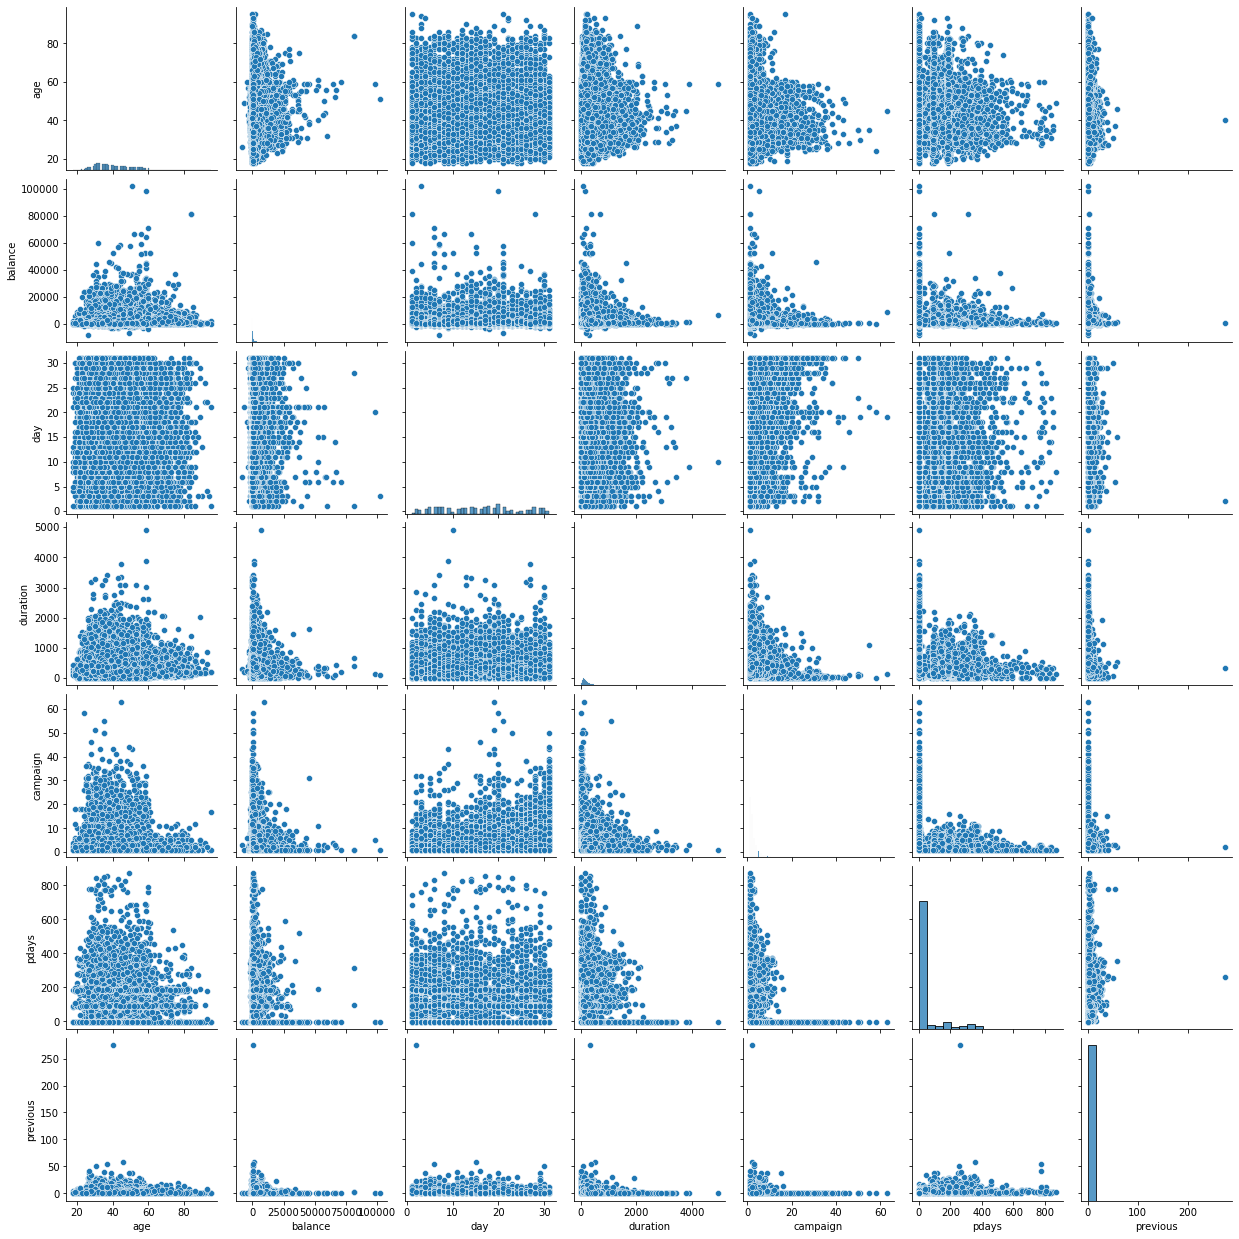

In [36]:
# pairplot
sns.pairplot(Market_bank)

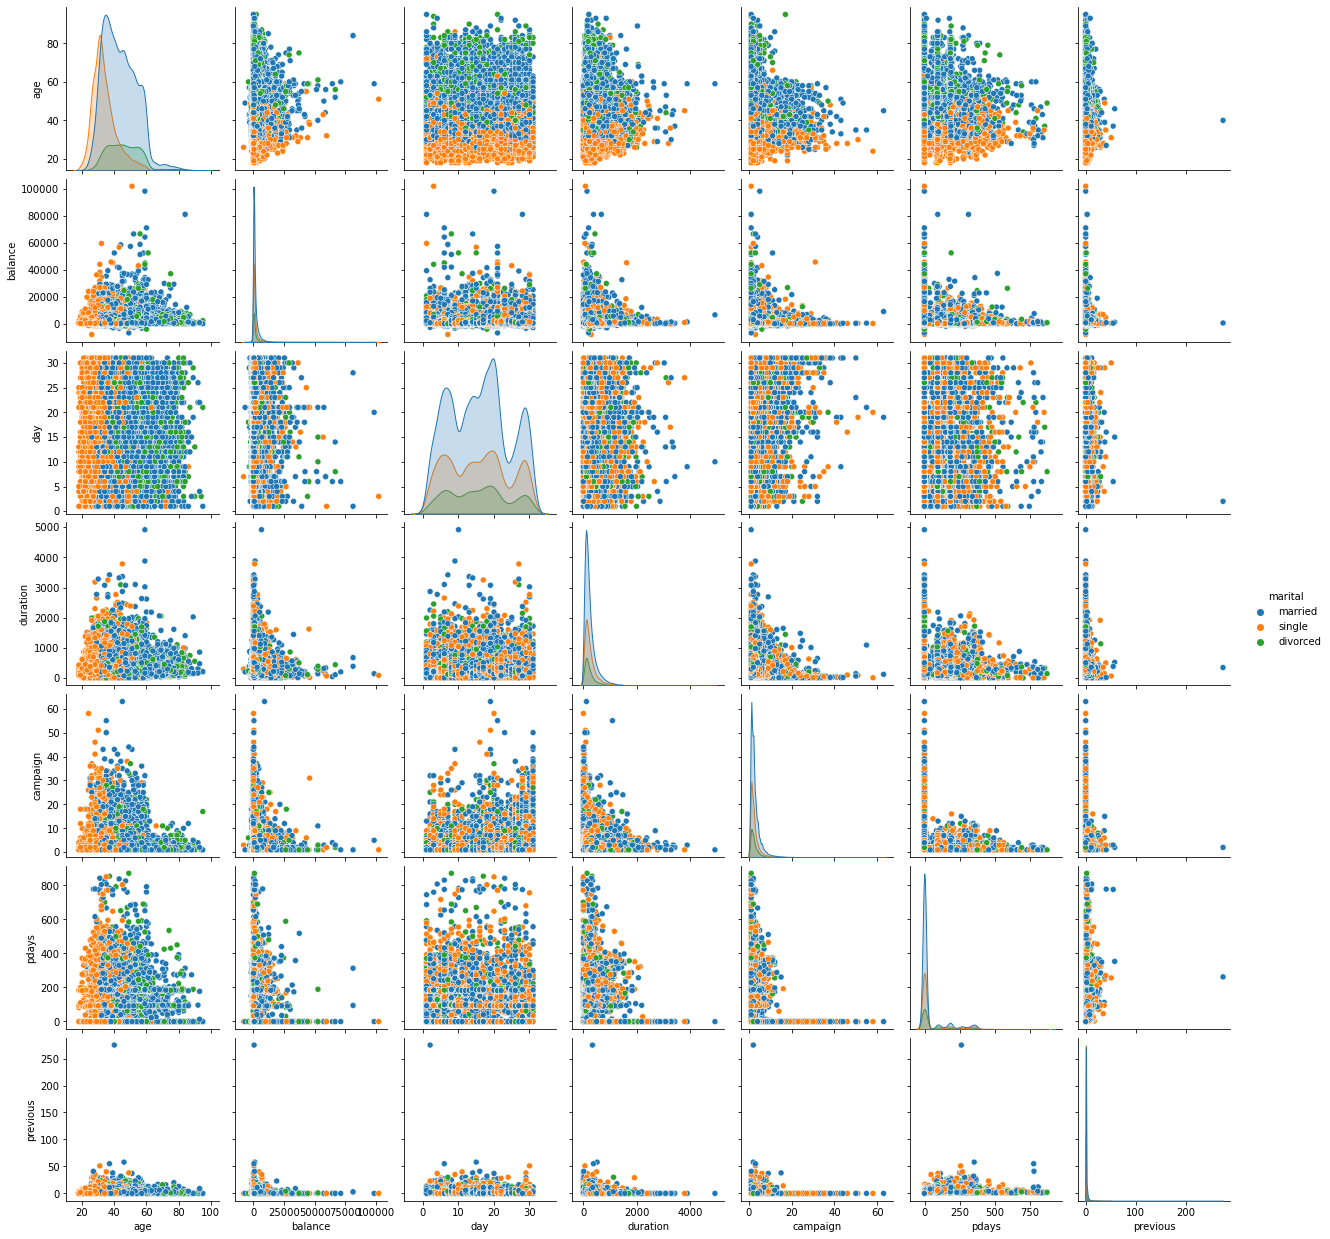

In [37]:
sns.pairplot(Market_bank, hue = 'marital')